![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [5]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [6]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

<Axes: title={'center': 'Sentiminetos por aerolínea'}, xlabel='airline'>

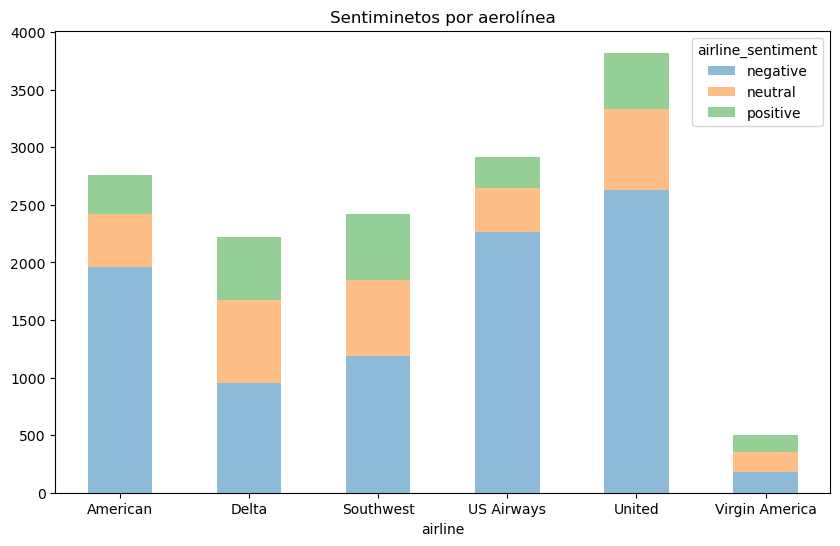

In [7]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import numpy as np
import pandas as pd
import nltk
from sklearn.metrics import accuracy_score
from collections import Counter
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.tokenize import word_tokenize
wordnet_lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('averaged_perceptron_tagger')
import nltk
nltk.download('wordnet')
# Importación de librerias
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sofia\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sofia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sofia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sofia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Sofia\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [9]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

In [10]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [11]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [12]:
# Celda 1

# Vectorizamos el texto
vectorizacion = CountVectorizer()
X_train_vectorizado = vectorizacion.fit_transform(X_train)
X_test_vectorizado = vectorizacion.transform(X_test)

modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train_vectorizado, y_train)

# Predecimos y calculamos la precisión del modelo
y_prediccion = modelo.predict(X_test_vectorizado)
accuracy_p1 = accuracy_score(y_test, y_prediccion)

print("Accuracy del modelo:", accuracy_p1)


Accuracy del modelo: 0.7711092715231788


**El valor obtenido, 0,7711, refleja un rendimiento decente, especialmente considerando la variabilidad que puede tener el lenguaje en los tweets y las distintas formas en que las personas expresan sus sentimientos.**


### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [13]:

# Celda 2
# Paso 1: crear objeto CountVectorizer y eliminar stopwords
vect = CountVectorizer(stop_words='english')

# Paso 2: aplicar el objeto CountVectorizer ya entrenado al set de entrenamiento
X_train_vect = vect.fit_transform(X_train)

# Paso 3: aplicar el objeto CountVectorizer ya entrenado al set de test
X_test_vect = vect.transform(X_test)

# Paso 4: crear objeto RandomForestClassifier y ajustarlo al set de entrenamiento
rf = RandomForestClassifier()
rf.fit(X_train_vect, y_train)

# Paso 5: predecir las etiquetas de sentimiento para el set de test
y_pred = rf.predict(X_test_vect)

# Paso 6: evaluar el desempeño del modelo usando la métrica de accuracy
from sklearn.metrics import accuracy_score
accuracy_p2 = accuracy_score(y_test, y_pred)
print("Accuracy Stopwords:", accuracy_p2)


Accuracy Stopwords: 0.7622102649006622


### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [14]:
# Celda 3
#_________________________________________________________________________________________
# Definición de la función que tenga como parámetro texto y devuelva una lista de lemas
#_________________________________________________________________________________________
#
# Acontinuación se define una función para lematizar el texto con verbos, esta función recibe 
# el párametro de texto para ser lematizado
#_________________________________________________________________________________________

def lemmatize_with_verbs(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    lemmatized_tokens = []
    for word, tag in pos_tag(tokens):
        if tag.startswith('V'):  # Si la palabra es un verbo
            lemmatized_tokens.append(lemmatizer.lemmatize(word, pos='v'))  # Lematizar el verbo
        else:
            lemmatized_tokens.append(word)  # Mantener la palabra original si no es un verbo
    return ' '.join(lemmatized_tokens)
#_________________________________________________________________________________________
#
# Acontinuación se define una función para lematizar el texto sin categoria gramatical,  
# esta función recibe el párametro de texto para ser lematizado
#_________________________________________________________________________________________

def split_into_lemmas(text):
    lemmatizer = WordNetLemmatizer()
    tokens = nltk.word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmas


In [15]:
#_________________________________________________________________________________________
# Para definir la mejor estrategia de lematizacón se utiliza un modelo RF y los distintos
# métodos de preprocesamiento
#_________________________________________________________________________________________

X_train_lemmatized = X_train.apply(lemmatize_with_verbs)
X_test_lemmatized = X_test.apply(lemmatize_with_verbs)

# Crear CountVectorizer con el analizador de split into lemas
vect_lemas_split = CountVectorizer(analyzer=split_into_lemmas)
# Crear CountVectorizer con el analizador de lematize with verbs
vect_lemas_verb = CountVectorizer(analyzer=lemmatize_with_verbs)

In [16]:
# Creación de matrices de documentos usando CountVectorizer
X_train_vectorized_split = vect_lemas_split.fit_transform(X_train)
X_test_vectorized_split = vect_lemas_split.transform(X_test)

X_train_vectorized_verb = vect_lemas_verb.fit_transform(X_train)
X_test_vectorized_verb = vect_lemas_verb.transform(X_test)

# Modelo de Random Forest
rf_classifier_split = RandomForestClassifier()
rf_classifier_verb = RandomForestClassifier()

rf_classifier_split.fit(X_train_vectorized_split, y_train)
rf_classifier_verb.fit(X_train_vectorized_verb, y_train)

# Metricas

accuracy_split = rf_classifier_split.score(X_test_vectorized_split, y_test)
accuracy_verb = rf_classifier_verb.score(X_test_vectorized_verb, y_test)
print("Accuracy usando split_into_lemmas:", accuracy_split)
print("Accuracy usando lemmatize_with_verbs:", accuracy_verb)

Accuracy usando split_into_lemmas: 0.765521523178808
Accuracy usando lemmatize_with_verbs: 0.7146109271523179


### Interpretación y comentarios punto 3
***Como se puede ver, la lematización con verbos le da al modelo un accuracy de 0.725, lo cual es más bajo que lematizar sin categoría gramatical. No obstante, el enunciado explícitamente pide evaluar el primer modelo, por lo que éste será tenido en cuenta para hacer la comparación en el punto 5.***


### Pasos adicionales punto 3
A continuación se decidió, proactivamente, mejorar el modelo y probar con otros para concluir cuál tiene la mejor métrica. Sin embargo, esto no será tenido en cuenta en el punto 5

In [17]:
#_________________________________________________________________________________________
# Debido al desbalance de clases se realiza el siguiente preprocesamiento
#_________________________________________________________________________________________
#
# (undersampling)
undersampler = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train_vectorized_split, y_train)

#(oversampling)
oversampler = RandomOverSampler(random_state=42)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train_vectorized_split, y_train)

# (SMOTE)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_vectorized_split, y_train)

# (SMOTEENN y SMOTETomek)
smoteenn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train_vectorized_split, y_train)
smotetomek = SMOTETomek(random_state=42)
X_train_smotetomek, y_train_smotetomek = smotetomek.fit_resample(X_train_vectorized_split, y_train)

# Verificar la distribución de las clases después del remuestreo
print("Distribución de clases después de submuestreo:")
print(Counter(y_train_undersampled))
print(Counter(y_train_oversampled))
print(Counter(y_train_smote))
print(Counter(y_train_smoteenn))
print(Counter(y_train_smotetomek))

Distribución de clases después de submuestreo:
Counter({-1: 1600, 0: 1600, 1: 1600})
Counter({0: 6093, -1: 6093, 1: 6093})
Counter({0: 6093, -1: 6093, 1: 6093})
Counter({1: 4051, 0: 3479, -1: 20})
Counter({-1: 6091, 0: 6086, 1: 6084})


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
#_________________________________________________________________________
# Modelo RF con balanceo de datos con lematización sin categorización
#_________________________________________________________________________
# Modelo BalancedRandomForestClassifier con cada técnica de remuestreo
brf_undersampled = RandomForestClassifier(random_state=42)
brf_oversampled = RandomForestClassifier(random_state=42)
brf_smote = RandomForestClassifier(random_state=42)
brf_smoteenn = RandomForestClassifier(random_state=42)
brf_smotetomek = RandomForestClassifier(random_state=42)

# Entrenamiento 
brf_undersampled.fit(X_train_undersampled, y_train_undersampled)
brf_oversampled.fit(X_train_oversampled, y_train_oversampled)
brf_smote.fit(X_train_smote, y_train_smote)
brf_smoteenn.fit(X_train_smoteenn, y_train_smoteenn)
brf_smotetomek.fit(X_train_smotetomek, y_train_smotetomek)

# Predicciones
brf_pred_undersampled = brf_undersampled.predict(X_test_vectorized_split)
brf_pred_oversampled = brf_oversampled.predict(X_test_vectorized_split)
brf_pred_smote = brf_smote.predict(X_test_vectorized_split)
brf_pred_smoteenn = brf_smoteenn.predict(X_test_vectorized_split)
brf_pred_smotetomek = brf_smotetomek.predict(X_test_vectorized_split)

# Metricas
accuracy_undersampled = accuracy_score(y_test, brf_pred_undersampled)
accuracy_oversampled = accuracy_score(y_test, brf_pred_oversampled)
accuracy_smote = accuracy_score(y_test, brf_pred_smote)
accuracy_smoteenn = accuracy_score(y_test, brf_pred_smoteenn)
accuracy_smotetomek = accuracy_score(y_test, brf_pred_smotetomek)

print("Accuracy usando RandomForestClassifier con submuestreo:", accuracy_undersampled)
print("Accuracy usando RandomForestClassifier con sobremuestreo aleatorio:", accuracy_oversampled)
print("Accuracy usando RandomForestClassifier con SMOTE:", accuracy_smote)
print("Accuracy usando RandomForestClassifier con SMOTEENN:", accuracy_smoteenn)
print("Accuracy usando RandomForestClassifier con SMOTETomek:", accuracy_smotetomek)

Accuracy usando BalancedRandomForestClassifier con submuestreo: 0.7193708609271523
Accuracy usando BalancedRandomForestClassifier con sobremuestreo aleatorio: 0.7913907284768212
Accuracy usando BalancedRandomForestClassifier con SMOTE: 0.7663493377483444
Accuracy usando BalancedRandomForestClassifier con SMOTEENN: 0.28683774834437087
Accuracy usando BalancedRandomForestClassifier con SMOTETomek: 0.7649006622516556


In [31]:
#_________________________________________________________________________
# Modelo RF con balanceo de datos con lematización categorización por verbos
#_________________________________________________________________________

# (undersampling)
undersampler = RandomUnderSampler(random_state=42)
X_train_undersampled_verb, y_train_undersampled_verb = undersampler.fit_resample(X_train_vectorized_verb, y_train)

#(oversampling)
oversampler = RandomOverSampler(random_state=42)
X_train_oversampled_verb_o, y_train_oversampled_verb_o = oversampler.fit_resample(X_train_vectorized_verb, y_train)

# Modelo BalancedRandomForestClassifier con cada técnica de remuestreo
brf_undersampled_verb = RandomForestClassifier(random_state=42)
brf_oversampled_verb = RandomForestClassifier(random_state=42)

# Entrenamiento 
brf_undersampled_verb.fit(X_train_undersampled_verb, y_train_undersampled_verb)
brf_oversampled_verb.fit(X_train_oversampled_verb_o, y_train_oversampled_verb_o)

# Predicciones
brf_pred_undersampled_verb = brf_undersampled_verb.predict(X_test_vectorized_verb)
brf_pred_oversampled_verb = brf_oversampled_verb.predict(X_test_vectorized_verb)

# Metricas
accuracy_undersampled_verb = accuracy_score(y_test, brf_pred_undersampled_verb)
accuracy_oversampled_verb = accuracy_score(y_test, brf_pred_oversampled_verb)

print("Accuracy usando RandomForestClassifier con submuestreo:", accuracy_undersampled_verb)
print("Accuracy usando RandomForestClassifier con sobremuestreo aleatorio:", accuracy_oversampled_verb)



Accuracy usando RandomForestClassifier con submuestreo: 0.6672185430463576
Accuracy usando RandomForestClassifier con sobremuestreo aleatorio: 0.7290976821192053


In [19]:
##Ajuste mediante el uso de otros algoritmos
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Modelo Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_oversampled, y_train_oversampled)
nb_pred = nb_classifier.predict(X_test_vectorized_split)


# Métricas Naive Bayes
accuracy_nb = accuracy_score(y_test, nb_pred)
precision_nb = precision_score(y_test, nb_pred, average='weighted')
recall_nb = recall_score(y_test, nb_pred, average='weighted')
f1_nb = f1_score(y_test, nb_pred, average='weighted')
classification_report_nb = classification_report(y_test, nb_pred)
print("Métricas Naive Bayes:")
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1-score:", f1_nb)
print("Reporte de clasificación:\n", classification_report_nb)

# Modelo KNN
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_oversampled, y_train_oversampled)
knn_pred = knn_classifier.predict(X_test_vectorized_split)

# Métricas KNN
accuracy_knn = accuracy_score(y_test, knn_pred)
precision_knn = precision_score(y_test, knn_pred, average='weighted')
recall_knn = recall_score(y_test, knn_pred, average='weighted')
f1_knn = f1_score(y_test, knn_pred, average='weighted')
classification_report_knn = classification_report(y_test, knn_pred)


print("\nMétricas KNN:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-score:", f1_knn)
print("Reporte de clasificación:\n", classification_report_knn)

Métricas Naive Bayes:
Accuracy: 0.8013245033112583
Precision: 0.8019547181234966
Recall: 0.8013245033112583
F1-score: 0.8008364580591182
Reporte de clasificación:
               precision    recall  f1-score   support

          -1       0.88      0.88      0.88      3085
           0       0.65      0.59      0.62       984
           1       0.67      0.77      0.72       763

    accuracy                           0.80      4832
   macro avg       0.74      0.75      0.74      4832
weighted avg       0.80      0.80      0.80      4832


Métricas KNN:
Accuracy: 0.357408940397351
Precision: 0.659172964140626
Recall: 0.357408940397351
F1-score: 0.3313886364718795
Reporte de clasificación:
               precision    recall  f1-score   support

          -1       0.87      0.18      0.29      3085
           0       0.27      0.63      0.37       984
           1       0.30      0.74      0.42       763

    accuracy                           0.36      4832
   macro avg       0.48      

In [20]:
# Modelo SVM
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_oversampled, y_train_oversampled)
svm_pred = svm_classifier.predict(X_test_vectorized_split)

# Métricas SVM
accuracy_svm = accuracy_score(y_test, svm_pred)
precision_svm = precision_score(y_test, svm_pred, average='weighted')
recall_svm = recall_score(y_test, svm_pred, average='weighted')
f1_svm = f1_score(y_test, svm_pred, average='weighted')
classification_report_svm = classification_report(y_test, svm_pred)

print("Métricas SVM:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_svm)
print("Reporte de clasificación:\n", classification_report_svm)

# Modelo Gradient Boosting
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train_oversampled, y_train_oversampled)
gb_pred = gb_classifier.predict(X_test_vectorized_split)

# Métricas Gradient Boosting
accuracy_gb = accuracy_score(y_test, gb_pred)
precision_gb = precision_score(y_test, gb_pred, average='weighted')
recall_gb = recall_score(y_test, gb_pred, average='weighted')
f1_gb = f1_score(y_test, gb_pred, average='weighted')
classification_report_gb = classification_report(y_test, gb_pred)

print("Métricas Gradient Boosting:")
print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1-score:", f1_gb)
print("Reporte de clasificación:\n", classification_report_gb)

Métricas SVM:
Accuracy: 0.7711092715231788
Precision: 0.7750268142397624
Recall: 0.7711092715231788
F1-score: 0.7728846574439636
Reporte de clasificación:
               precision    recall  f1-score   support

          -1       0.86      0.85      0.85      3085
           0       0.56      0.59      0.57       984
           1       0.70      0.69      0.70       763

    accuracy                           0.77      4832
   macro avg       0.71      0.71      0.71      4832
weighted avg       0.78      0.77      0.77      4832

Métricas Gradient Boosting:
Accuracy: 0.7168874172185431
Precision: 0.7690830186144436
Recall: 0.7168874172185431
F1-score: 0.7302270890112358
Reporte de clasificación:
               precision    recall  f1-score   support

          -1       0.91      0.72      0.80      3085
           0       0.50      0.71      0.58       984
           1       0.56      0.73      0.63       763

    accuracy                           0.72      4832
   macro avg       0.

In [21]:
# Modelo BalancedRandomForestClassifier
brf_classifier = BalancedRandomForestClassifier(random_state=42)
brf_classifier.fit(X_train_oversampled, y_train_oversampled)
brf_pred = brf_classifier.predict(X_test_vectorized_split)

# Métricas
accuracy_brf = accuracy_score(y_test, brf_pred)
precision_brf = precision_score(y_test, brf_pred, average='weighted')
recall_brf = recall_score(y_test, brf_pred, average='weighted')
f1_brf = f1_score(y_test, brf_pred, average='weighted')
classification_report_brf = classification_report(y_test, brf_pred)

print("Métricas BalancedRandomForestClassifier:")
print("Accuracy:", accuracy_brf)
print("Precision:", precision_brf)
print("Recall:", recall_brf)
print("F1-score:", f1_brf)
print("Reporte de clasificación:\n", classification_report_brf)

Métricas BalancedRandomForestClassifier:
Accuracy: 0.7882864238410596
Precision: 0.7796011732819458
Recall: 0.7882864238410596
F1-score: 0.7761075691740941
Reporte de clasificación:
               precision    recall  f1-score   support

          -1       0.81      0.94      0.87      3085
           0       0.66      0.51      0.57       984
           1       0.78      0.56      0.65       763

    accuracy                           0.79      4832
   macro avg       0.75      0.67      0.70      4832
weighted avg       0.78      0.79      0.78      4832



In [22]:
# Modelo AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train_oversampled, y_train_oversampled)
adaboost_pred = adaboost_classifier.predict(X_test_vectorized_split)


# Métricas AdaBoostClassifier
accuracy_bagging = accuracy_score(y_test, adaboost_pred)
precision_bagging = precision_score(y_test, adaboost_pred, average='weighted')
recall_bagging = recall_score(y_test, adaboost_pred, average='weighted')
f1_bagging = f1_score(y_test, adaboost_pred, average='weighted')
classification_report_bagging = classification_report(y_test, adaboost_pred)

print("Métricas BaggingClassifier:")
print("Accuracy:", accuracy_bagging)
print("Precision:", precision_bagging)
print("Recall:", recall_bagging)
print("F1-score:", f1_bagging)
print("Reporte de clasificación:\n", classification_report_bagging)

Métricas BaggingClassifier:
Accuracy: 0.6901903973509934
Precision: 0.7559955714446501
Recall: 0.6901903973509934
F1-score: 0.7060717399605252
Reporte de clasificación:
               precision    recall  f1-score   support

          -1       0.90      0.68      0.77      3085
           0       0.45      0.68      0.54       984
           1       0.57      0.75      0.65       763

    accuracy                           0.69      4832
   macro avg       0.64      0.70      0.65      4832
weighted avg       0.76      0.69      0.71      4832



In [24]:
brf_pred_oversampled = brf_oversampled.predict(X_test_vectorized_split)

# Métricas RandomForestClassifier
accuracy_rf = accuracy_score(y_test, brf_pred_oversampled)
precision_rf = precision_score(y_test, brf_pred_oversampled, average='weighted')
recall_rf = recall_score(y_test, brf_pred_oversampled, average='weighted')
f1_rf = f1_score(y_test, brf_pred_oversampled, average='weighted')

print("Random Forest Metrics (Oversampled):")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Random Forest Metrics (Oversampled):
Accuracy: 0.7913907284768212
Precision: 0.7826282780811741
Recall: 0.7913907284768212
F1 Score: 0.780136340052312


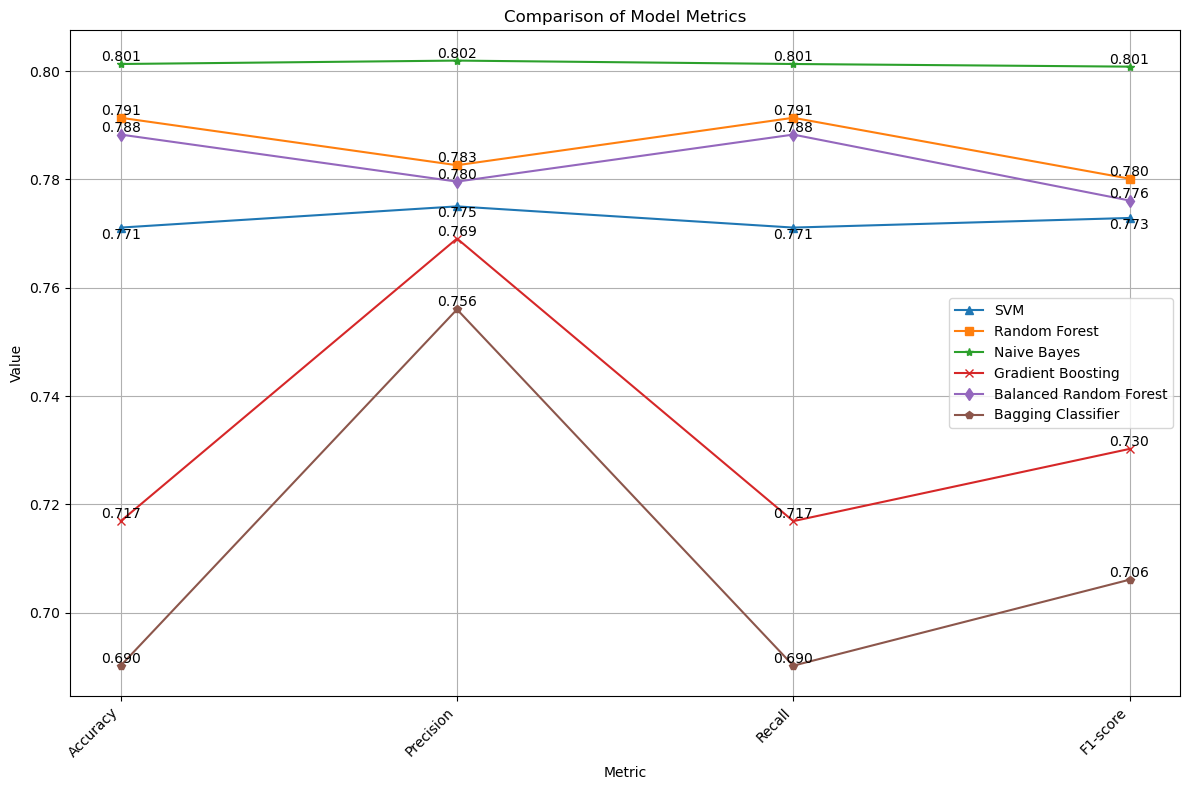

In [28]:
import matplotlib.pyplot as plt

svm_metric_values = [accuracy_svm, precision_svm, recall_svm, f1_svm]
rf_metric_values = [accuracy_rf, precision_rf, recall_rf, f1_rf]
nb_metric_values = [accuracy_nb, precision_nb, recall_nb, f1_nb]
gb_metric_values = [accuracy_gb, precision_gb, recall_gb, f1_gb]
brf_metric_values = [accuracy_brf, precision_brf, recall_brf, f1_brf]
bag_metric_values = [accuracy_bagging, precision_bagging, recall_bagging, f1_bagging]


metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']

plt.figure(figsize=(12, 8))



plt.plot(metric_names, svm_metric_values, marker='^', label='SVM', linestyle='-')
plt.plot(metric_names, rf_metric_values, marker='s', label='Random Forest', linestyle='-')
plt.plot(metric_names, nb_metric_values, marker='*', label='Naive Bayes', linestyle='-')
plt.plot(metric_names, gb_metric_values, marker='x', label='Gradient Boosting', linestyle='-')
plt.plot(metric_names, brf_metric_values, marker='d', label='Balanced Random Forest', linestyle='-')
plt.plot(metric_names, bag_metric_values, marker='p', label='Bagging Classifier', linestyle='-')



    
for i, metric_value in enumerate(rf_metric_values):
    rounded_value = round(metric_value, 3)  # Round to 3 decimal places
    plt.annotate(f"{rounded_value:.3f}", xy=(metric_names[i], metric_value), 
                 horizontalalignment='center', verticalalignment='bottom')
for i, metric_value in enumerate(nb_metric_values):
    rounded_value = round(metric_value, 3)  # Round to 3 decimal places
    plt.annotate(f"{rounded_value:.3f}", xy=(metric_names[i], metric_value), 
                 horizontalalignment='center', verticalalignment='bottom')
for i, metric_value in enumerate(gb_metric_values):
    rounded_value = round(metric_value, 3)  # Round to 3 decimal places
    plt.annotate(f"{rounded_value:.3f}", xy=(metric_names[i], metric_value), 
                 horizontalalignment='center', verticalalignment='bottom')
for i, metric_value in enumerate(brf_metric_values):
    rounded_value = round(metric_value, 3)  # Round to 3 decimal places
    plt.annotate(f"{rounded_value:.3f}", xy=(metric_names[i], metric_value), 
                 horizontalalignment='center', verticalalignment='bottom')
for i, metric_value in enumerate(bag_metric_values):
    rounded_value = round(metric_value, 3)  # Round to 3 decimal places
    plt.annotate(f"{rounded_value:.3f}", xy=(metric_names[i], metric_value), 
                 horizontalalignment='center', verticalalignment='bottom')
for i, metric_value in enumerate(svm_metric_values):
    rounded_value = round(metric_value, 3)
    plt.annotate(f"{rounded_value:.3f}", xy=(metric_names[i], metric_value), 
                 horizontalalignment='center', verticalalignment='top')



plt.title('Comparison of Model Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()


### Mejor Modelo

De acuerdo con el enunciado se crea un modelo RF balanceado que tiene un accuracy de 0.791, sin embargo al ser evaluado respecto a otros modelos es posible confirmar que el modelo Naive Bayes presenta un mejor desempeño con un accuracy de 0.801.

Sin embargo, considerando la naturaleza del problema de identificación de sentimientos en tweets, el mejor modelo dependerá de la importancia relativa de la precisión y el recall, dado que la identificación precisa de sentimientos es crucial en este escenario, la precisión y el recall son métricas clave a considerar. Un alto recall asegura que el modelo capture la mayoría de los tweets relevantes (positivos o negativos), mientras que una alta precisión indica que la mayoría de los tweets clasificados como positivos o negativos son realmente correctos.

Por otra parte aunque la exactitud puede ser útil para evaluar el rendimiento general del modelo, es importante tener en cuenta que puede ser engañosa en conjuntos de datos desbalanceados, como es el caso actual.

No obstante, estos modelos no serán tenidos en cuenta para la comparación del punto 5, sino solamente el RF no balanceado con accuracy de 0.725.


### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [32]:
# Celda 4
# Definir stop words
spanish_stopwords = nltk.corpus.stopwords.words('spanish')

## Lematizar verbos

def lemmatize_with_verbs(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    lemmatized_tokens = []
    for word, tag in pos_tag(tokens):
        if tag.startswith('V'):  # Si la palabra es un verbo
            lemmatized_tokens.append(lemmatizer.lemmatize(word, pos='v'))  # Lematizar el verbo
        else:
            lemmatized_tokens.append(word)  # Mantener la palabra original si no es un verbo
    return ' '.join(lemmatized_tokens)

# Initialize the CountVectorizer
vectorizer_count = CountVectorizer(stop_words=spanish_stopwords, analyzer=lemmatize_with_verbs)
X_train_vectorizado = vectorizer_count.fit_transform(X_train)
X_test_vectorizado = vectorizer_count.transform(X_test)

# train XGBoost model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_vectorizado, y_train)

# make predictions on test set
y_pred = model.predict(X_test_vectorizado)
accuracy_p4 = accuracy_score(y_test, y_pred)

print("Accuracy del modelo:", accuracy_p4)


Accuracy del modelo: 0.7249586092715232


### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

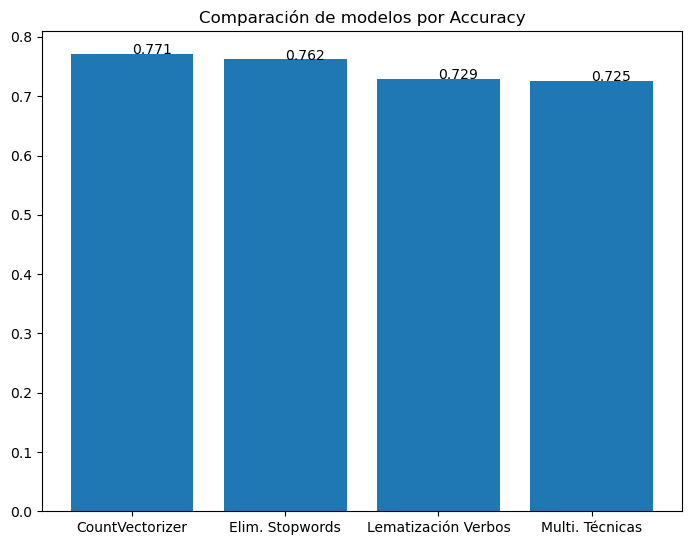

In [36]:
# Celda 5
accuracy_p3=accuracy_oversampled_verb

##Comparación de Accuracy
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos por Accuracy")
ejeX = ['CountVectorizer','Elim. Stopwords' ,'Lematización Verbos','Multi. Técnicas']
ejeY = [round(accuracy_p1,3),round(accuracy_p2,3),round(accuracy_p3,3),round(accuracy_p4,3)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

### Comentarios finales
Como se puede ver, el modelo con solo CountVectorizer tiene un mejor desempeño, mientras que los que eliminan stopwords y lematizan con verbos pierden accuracy. Esto se puede deber a que eliminar stopwords o lematizar puede hacer que se pierda información importante, en especial en casos en los que los textos son muy reducidos, como lo son los tweets. Adicionalmente, se debe tener en cuenta que los tweets son muy informales y ya de por sí pueden tener varias abreviaciones en su contenido. Por otro lado, twitter es una plataforma global, por lo que, aunque los textos sean en espanol, puede que las mismas palabras o verbos tengan diferentes significados dependiendo del origen del autor. Entonces, teniendo en cuenta la globalidad de twitter y la restriccion de caracteres de los comentarios, el modelo original puede ser más apto ya que mantiene la máxima información posible.